In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import calendar
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/marharyta/Desktop/Data_science/IT_Academy/Data_science_course/Контрольная/train.csv')
print('Size of the dataframe:', df.shape)
df.head( )

Size of the dataframe: (519803, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,885116c8-8e5c-4d4e-af4d-1fd53c6b2464,1.543564e+09,7,30,11,2018-11-30 07:47:56,America/New_York,North Station,South Station,Lyft,...,0.0003,1543593600,28.78,1543579200,42.64,1543600800,26.35,1543575600,40.61,1543611600
1,93fb610d-bb94-45bc-98b8-0a4a2e349ab2,1.544822e+09,21,14,12,2018-12-14 21:20:11,America/New_York,West End,South Station,Uber,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
2,69244a0f-6ec6-4265-b73e-3dcb069d671e,1.543834e+09,10,3,12,2018-12-03 10:52:59,America/New_York,Theatre District,Boston University,Lyft,...,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
3,230cbecb-368e-4b8d-b9f1-67a40f68991f,1.543759e+09,14,2,12,2018-12-02 14:03:04,America/New_York,Boston University,Back Bay,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
4,6c873c64-967e-47f2-bd89-5ec6fd330aa3,1.544973e+09,15,16,12,2018-12-16 15:05:17,America/New_York,Financial District,North End,Lyft,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519803 entries, 0 to 519802
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           519803 non-null  object 
 1   timestamp                    519803 non-null  float64
 2   hour                         519803 non-null  int64  
 3   day                          519803 non-null  int64  
 4   month                        519803 non-null  int64  
 5   datetime                     519803 non-null  object 
 6   timezone                     519803 non-null  object 
 7   source                       519803 non-null  object 
 8   destination                  519803 non-null  object 
 9   cab_type                     519803 non-null  object 
 10  product_id                   519803 non-null  object 
 11  name                         519803 non-null  object 
 12  price                        478523 non-null  float64
 13 

In [4]:
# convert column datetime to datetime format and check if it was modified correctly
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519803 entries, 0 to 519802
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           519803 non-null  object        
 1   timestamp                    519803 non-null  float64       
 2   hour                         519803 non-null  int64         
 3   day                          519803 non-null  int64         
 4   month                        519803 non-null  int64         
 5   datetime                     519803 non-null  datetime64[ns]
 6   timezone                     519803 non-null  object        
 7   source                       519803 non-null  object        
 8   destination                  519803 non-null  object        
 9   cab_type                     519803 non-null  object        
 10  product_id                   519803 non-null  object        
 11  name                      

In [5]:
# Let's find the day of the week from datetime column, so we can use it for analysis
df['weekday']= df['datetime'].dt.day_name()

In [6]:
# now we can drop columns that we don't need for regression analysis
df.drop('id', inplace=True, axis=1)
df.drop('datetime', inplace=True, axis=1)
df.drop('timestamp', inplace=True, axis=1)
df.drop('product_id', inplace=True, axis=1)
df.drop('long_summary', inplace=True, axis=1) # short summary should be enough
#df.drop('windGustTime', inplace=True, axis=1)
#df.drop('temperatureHighTime', inplace=True, axis=1)
#df.drop('temperatureLowTime', inplace=True, axis=1)
#df.drop('apparentTemperatureHighTime', inplace=True, axis=1)
#df.drop('apparentTemperatureLowTime', inplace=True, axis=1)



In [7]:
# find missing values
def check_missing(data,output_path=None):
    result = pd.concat([data.isnull().sum(),data.isnull().mean()],axis=1)
    result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
    if output_path is not None:
        result.to_csv(output_path+'missing.csv')
        print(output_path, 'missing.csv')
    return result

In [8]:
check_missing(data = df)

,total missing,proportion
hour,0,0.000000
day,0,0.000000
month,0,0.000000
timezone,0,0.000000
source,0,0.000000
destination,0,0.000000
cab_type,0,0.000000
name,0,0.000000
price,41280,0.079415
distance,0,0.000000


In [9]:
# only price column has missing values and it has a very small proportion, less than 1%. Because it is our target variable it is better to drop missing values
def drop_missing(data,axis=0):
    data_copy = data.copy(deep=True)
    data_copy = data_copy.dropna(axis=axis,inplace=False)
    return data_copy

In [10]:
# check if there are any missing values left
df_new = drop_missing(df)
df_new.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTe

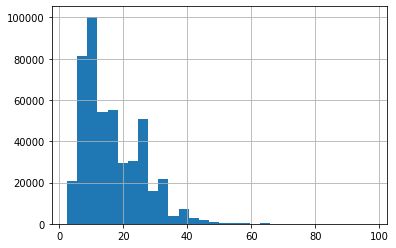

In [11]:
# distribution of the target variable
df_new.price.hist(bins=30);

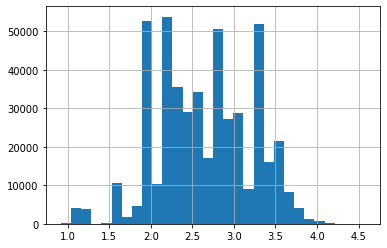

In [12]:
# it is better to transform it a bit
df['price'] = np.log(df['price'])
df.price.hist(bins=30);

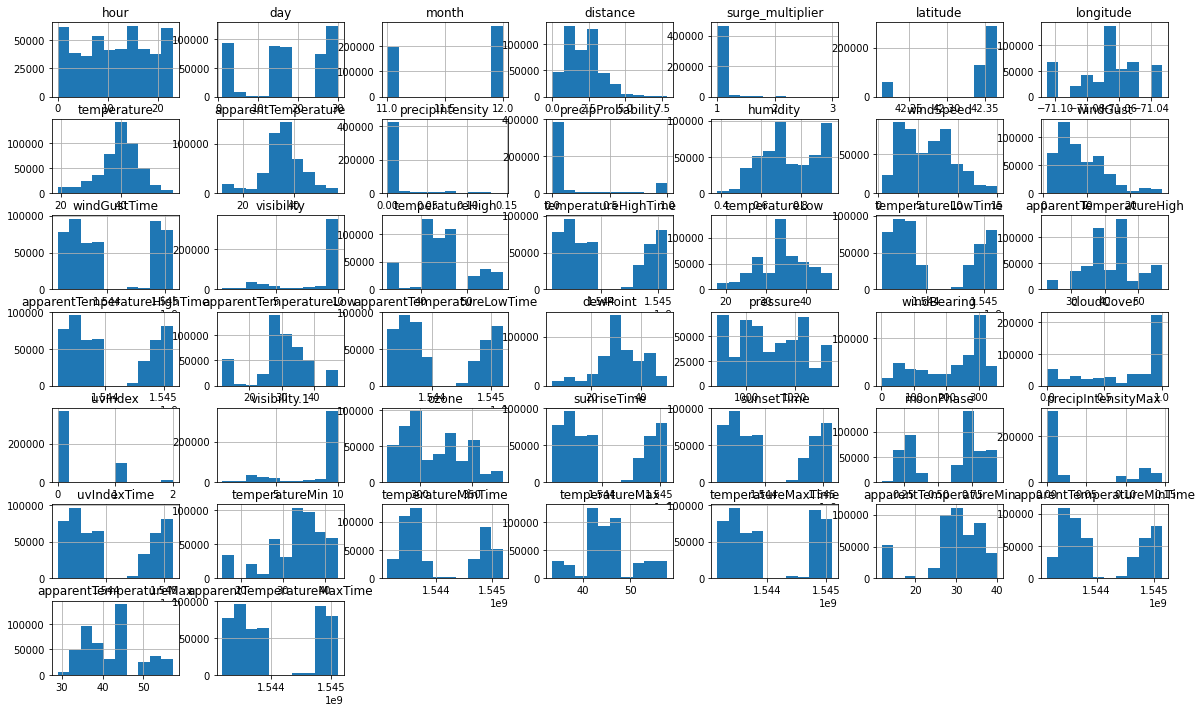

In [13]:
# how other variables are distributed
df_new.drop('price',axis=1).hist(figsize=(20, 12));

In [14]:
# find the continuous variables before the analysis and save it in a list for later
df_continuous = df_new.select_dtypes(exclude=['object'])
list_continious = df_continuous.columns.values.tolist()
list_continious

['hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [15]:
# now we need to make OneHotEncoding for categorial variables
df_categor = df_new.select_dtypes(['object'])
list_categor = df_categor.columns.values.tolist()
df_new = pd.get_dummies(df_new, columns=list_categor)
# check newly created columns and that there are no variables with only two inputs
new_columns = df_new.columns.values.tolist()
new_columns

['hour',
 'day',
 'month',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'moonPhase',
 'precipIntensityMax',
 'uvIndexTime',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'timezone_America/New_York',
 'source_Back Bay',
 'source_Beacon Hill',
 'source_Boston University',
 'source_Fenway',
 'source_Financial District',
 'source_Hayma

In [16]:
# all the object datatypes are gone
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478523 entries, 0 to 519802
Columns: 107 entries, hour to weekday_Wednesday
dtypes: float64(28), int64(17), uint8(62)
memory usage: 196.2 MB


In [17]:
# now we can split our dataset
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, test_size = 0.3)

In [18]:
# for continuous variables we have to do standard scaling, we saved the names of the columns before
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# teach the scaler on the train dataset
scaler.fit(df_train[list_continious])

StandardScaler()

In [19]:
# Apply scaler to train
df_train_scale = scaler.transform(df_train[list_continious])

# Apply scaler to test
df_test_scale = scaler.transform(df_test[list_continious])

In [20]:
# Change the values to scaled ones
df_train[list_continious] = df_train_scale
df_test[list_continious] = df_test_scale

In [21]:
# everything is scaled now
df_train.head()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
72656,1.350420,-0.383953,0.840729,-1.024530,0.900800,-0.157172,0.032656,-1.133458,0.496098,0.698986,...,0,1,0,1,0,0,0,0,0,0
197787,0.055575,0.920416,-1.189445,0.639909,0.186843,-0.157172,0.286088,0.546316,0.999665,1.051017,...,0,0,1,0,0,0,0,0,1,0
391276,-1.383142,1.121088,-1.189445,-0.863455,-0.659328,-0.157172,0.097585,-1.680247,-0.245140,-0.498423,...,0,1,0,0,0,0,0,1,0,0
3670,-1.239270,1.121088,-1.189445,-0.326540,-0.156914,-0.157172,-2.585443,1.634967,-0.316442,-0.628384,...,0,1,0,0,0,0,0,1,0,0
344050,-1.527013,1.121088,-1.189445,-1.078221,-1.382099,-0.157172,0.554182,0.590650,-0.170868,-0.430288,...,0,1,0,0,0,0,0,1,0,0


In [22]:
# now we need to take out our target variable 'price'

y_train = df_train.price
y_test = df_test.price

X_train = df_train.drop('price', axis=1)
X_test = df_test.drop('price', axis=1)

In [23]:
y_train.head()

72656    -1.024530
197787    0.639909
391276   -0.863455
3670     -0.326540
344050   -1.078221
Name: price, dtype: float64

Now we can built first a linear regression model!

In [24]:
# For calculating the metrics
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    pass

In [25]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred_regr = model_regression.predict(X_test)

In [26]:
print_metrics(y_test,y_pred_regr)
# metrics are not bad with R2 of 0.93

MAE: 0.9432401716522627
RMSE: 27.04760784509255
R2: 0.9285301716305502


In [27]:
print(model_regression.n_features_in_)

106


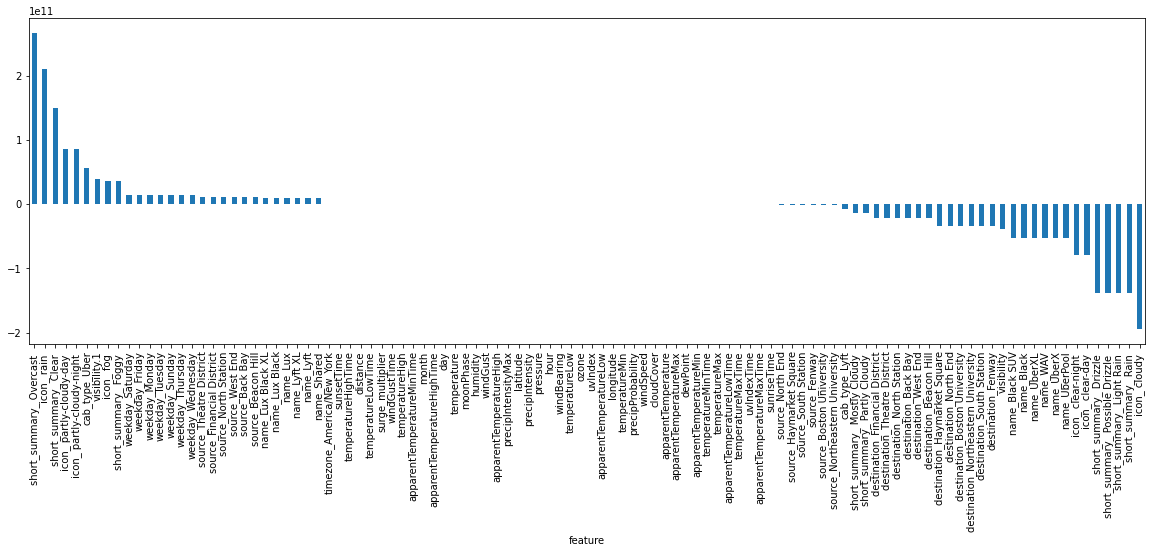

In [28]:
# Let's check feature importance
featureImportance = pd.DataFrame({"feature": df_new.drop('price',axis=1).columns,
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(20, 6));

In [29]:
# Now we can also build a model with regularization : Lasso
from sklearn.linear_model import Lasso
# alpha was chosen using GridSearch, see below
model_simplelasso = Lasso(alpha=0.0001)

model_simplelasso.fit(X_train, y_train)

y_pred_lasso = model_simplelasso.predict(X_test)

In [30]:
print_metrics(y_test,y_pred_lasso)

MAE: 0.9436615253690499
RMSE: 27.04988533942454
R2: 0.9285308587134795


In [31]:
"""from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.0005, 0.001]}

model_lasso = Lasso()

grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Best alpha value:', grid_cv_lasso.best_params_)
"""

"from sklearn.model_selection import GridSearchCV\n\nparam_grid = {'alpha': [0.0001, 0.0005, 0.001]}\n\nmodel_lasso = Lasso()\n\ngrid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)\ngrid_cv_lasso.fit(X_train, y_train)\nprint('Best alpha value:', grid_cv_lasso.best_params_)\n"

In [32]:
# Using xgboost
import xgboost as xg
# Instantiation
xgb_r = xg.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)

In [33]:
print_metrics(y_test,pred)

MAE: 0.5499425302987985
RMSE: 18.37834915272989
R2: 0.9675540230015689


In [34]:
# The best R2 and other metrics were achieved using xgboost